In [8]:
import torch
import torch.nn.functional as F

In [33]:
query = torch.rand(8, 3)
key = torch.rand(100, 3)
value = torch.rand(100, 10)

In [34]:
F.scaled_dot_product_attention(query,key,value).shape

torch.Size([8, 10])

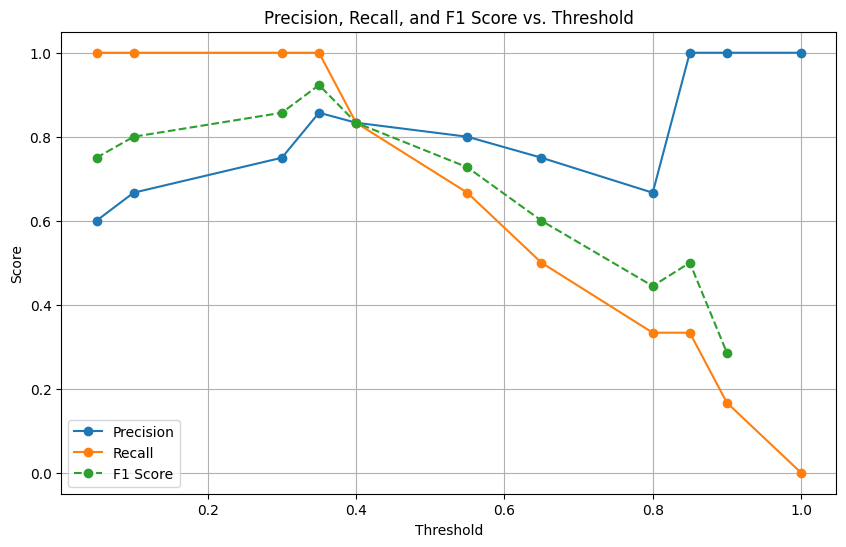

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Sample data: true labels and predicted probabilities
y_true = np.array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.9, 0.05, 0.65, 0.3, 0.55, 0.85])

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = f1_scores[:-1]  # to match the length of thresholds

# Append a threshold for the last point to align with precision and recall
thresholds = np.append(thresholds, 1.0)

# Plot precision, recall, and F1 score against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision', marker='o')
plt.plot(thresholds, recall, label='Recall', marker='o')
plt.plot(thresholds[:-1], f1_scores, label='F1 Score', marker='o', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X):
        n_samples, n_features = X.shape
        # Initialize centroids randomly from the data points
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for i in range(self.max_iter):
            # Assignment step
            self.labels = self._assign_clusters(X)

            # Update step
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) < self.tol):
                break

            self.centroids = new_centroids

    def _assign_clusters(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

    def predict(self, X):
        return self._assign_clusters(X)

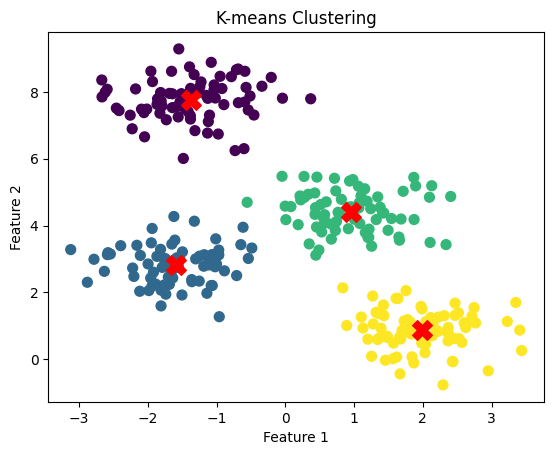

In [6]:
# Create a simple dataset
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Fit the KMeans model
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red', marker='X')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [17]:
import random
import math
import numpy as np

def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def mean(points):
    n = len(points)
    if n == 0:
        return points[0]  # Avoid division by zero
    dim = len(points[0])
    
    mean_point = [0] * dim
    for point in points:
        for i in range(dim):
            mean_point[i] += point[i]
    mean_point = [x / n for x in mean_point]
    return mean_point

class KMeans:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.k = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        
    def fit(self, X):
        n_samples = len(X)
        dim = X[0]

        # Initialize random centroids
        self.centroids = random.sample(X, self.n_clusters)

        for _ in range(self.max_iterations):
            clusters = [[] for _ in range(self.n_clusters)]
    
            for point in X:
                distance = [euclidean_distance(point, centroid) for centroid in self.centroids]
                closest_centroid_index = distances.index(min(distances))
                clusters[closest_centroid_index].append(point)
    
    
            # Update centroids
            new_centroids = [mean(cluster) for cluster in clusters]
            converded = True
    
            # Convergence
            for old_centroid, new_centroid in zip(self.centroids, new_centroids):
                if euclidean_distance(old_centroid, new_centroid) > self.tol:
                    converged = False
                    break
    
            self.centroids = new_centroids
            if converged:
                break

        
    def predict(self, X):
        pass

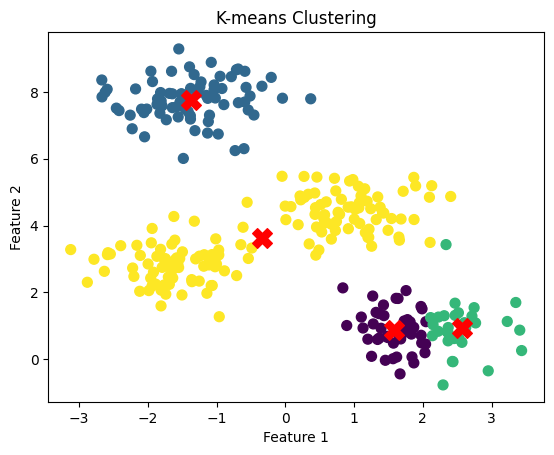

In [8]:
# Example usage
if __name__ == "__main__":
    # Create a simple dataset
    from sklearn.datasets import make_blobs
    X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
    X = X.tolist()  # Convert to list of lists

    # Fit the KMeans model
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)

    # Plot the results
    import matplotlib.pyplot as plt
    plt.scatter([point[0] for point in X], [point[1] for point in X], c=y_kmeans, s=50, cmap='viridis')
    plt.scatter([centroid[0] for centroid in kmeans.centroids], [centroid[1] for centroid in kmeans.centroids], s=200, c='red', marker='X')
    plt.title("K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
def generate_data():
    X, y = make_blobs(n_samples=1500, centers=3, random_state=42)
    return X

# Function to perform hierarchical k-means
def hierarchical_kmeans(X, n_clusters_list):
    clusters = {}
    level_data = {0: X}
    
    for level, n_clusters in enumerate(n_clusters_list):
        clusters[level] = {}
        next_level_data = {}
        
        for cluster_id, data in level_data.items():
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            labels = kmeans.fit_predict(data)
            
            for sub_cluster_id in range(n_clusters):
                sub_cluster_data = data[labels == sub_cluster_id]
                clusters[level][(cluster_id, sub_cluster_id)] = sub_cluster_data
                next_level_data[(cluster_id, sub_cluster_id)] = sub_cluster_data
        
        level_data = next_level_data
    
    return clusters

# Plot the results
def plot_clusters(clusters, level):
    plt.figure(figsize=(8, 6))
    
    for (parent_cluster, sub_cluster), data in clusters[level].items():
        plt.scatter(data[:, 0], data[:, 1], label=f'Cluster {parent_cluster}-{sub_cluster}')
    
    plt.title(f'Hierarchical K-means Level {level}')
    plt.legend()
    plt.show()

# Main function
def main():
    X = generate_data()
    n_clusters_list = [3, 2]  # Number of clusters at each level
    clusters = hierarchical_kmeans(X, n_clusters_list)
    
    for level in range(len(n_clusters_list)):
        plot_clusters(clusters, level)

main()
